# Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as dg
from sklearn.cluster import AgglomerativeClustering
from sklearn_extra.cluster import KMedoids
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

# <font color='red'>Read Data</font>

In [2]:
file=pd.read_csv("medicines_unclean.csv")
file

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
1,14.75,1.73,2.39,11.4,91.0,3.10,3.69,0.43,2.81,5.40,1.25,2.73,1150
2,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
3,14.38,1.87,2.38,12.0,102.0,3.30,3.64,0.29,2.96,7.50,1.20,3.00,1547
4,14.38,3.59,2.28,16.0,102.0,3.25,3.17,0.27,2.19,4.90,1.04,3.44,1065
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,11.56,2.05,3.23,28.5,119.0,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465
176,11.46,3.74,1.82,19.5,107.0,3.18,2.58,0.24,3.58,2.90,0.75,2.81,562
177,11.45,2.40,2.42,20.0,96.0,2.90,2.79,0.32,1.83,3.25,0.80,3.39,625
178,11.41,0.74,2.50,21.0,88.0,2.48,2.01,0.42,1.44,3.08,1.10,2.31,434


# <font color='red'>Data Cleaning</font>

In [3]:
print(file.shape)
file=file.drop_duplicates()
file.shape

(180, 13)


(174, 13)

In [4]:
print(file.isnull().any())
file.isnull().sum()

Alcohol                  True
Malic_Acid              False
Ash                      True
Ash_Alcanity            False
Magnesium                True
Total_Phenols            True
Flavanoids              False
Nonflavanoid_Phenols    False
Proanthocyanins          True
Color_Intensity         False
Hue                     False
OD280                    True
Proline                 False
dtype: bool


Alcohol                 1
Malic_Acid              0
Ash                     1
Ash_Alcanity            0
Magnesium               1
Total_Phenols           1
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         1
Color_Intensity         0
Hue                     0
OD280                   1
Proline                 0
dtype: int64

In [5]:
def clean (file):
    n=int(input("Enter 1: fill missing value with mean\nEnter 2: fill missing value with number you choose it\nEnter 3: drop the row containing a missing value"))
    if n==1: #fill missing value with mean
        for i in range (0,file.shape[1]):
            mean=file.iloc[:,i].mean()
            file.iloc[:,i] = file.iloc[:,i].fillna(mean)
    elif n==2: #fill missing value with number you choose it
        nn=float(input("enter the number"))
        file = file.fillna(nn)
    elif n==3: #drop the row containing a missing value1
        file = file.dropna()
    else:
        print("not defined")
    return file   

In [6]:
file=clean(file)
file.isnull().sum()

Enter 1: fill missing value with mean
Enter 2: fill missing value with number you choose it
Enter 3: drop the row containing a missing value1


C:\Users\spide\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

# <font color='red'>Data Visualization</font>

In [7]:
file.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
1,14.75,1.73,2.39,11.4,91.0,3.10,3.69,0.43,2.81,5.40,1.25,2.73,1150
2,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
3,14.38,1.87,2.38,12.0,102.0,3.30,3.64,0.29,2.96,7.50,1.20,3.00,1547
4,14.38,3.59,2.28,16.0,102.0,3.25,3.17,0.27,2.19,4.90,1.04,3.44,1065


In [8]:
file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174 entries, 0 to 179
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               174 non-null    float64
 1   Malic_Acid            174 non-null    float64
 2   Ash                   174 non-null    float64
 3   Ash_Alcanity          174 non-null    float64
 4   Magnesium             174 non-null    float64
 5   Total_Phenols         174 non-null    float64
 6   Flavanoids            174 non-null    float64
 7   Nonflavanoid_Phenols  174 non-null    float64
 8   Proanthocyanins       174 non-null    float64
 9   Color_Intensity       174 non-null    float64
 10  Hue                   174 non-null    float64
 11  OD280                 174 non-null    float64
 12  Proline               174 non-null    int64  
dtypes: float64(12), int64(1)
memory usage: 19.0 KB


In [9]:
file.describe().T

,count,mean,std,min,25%,50%,75%,max
Alcohol,174.0,13.009711,0.806063,11.03,12.3700,13.050,13.6700,14.83
Malic_Acid,174.0,2.359598,1.118379,0.74,1.6100,1.875,3.1150,5.80
Ash,174.0,2.366243,0.273714,1.36,2.2100,2.360,2.5475,3.23
Ash_Alcanity,174.0,19.483333,3.352578,10.60,17.1250,19.500,21.5000,30.00
Magnesium,174.0,99.797688,14.123714,70.00,88.0000,98.000,107.0000,162.00
Total_Phenols,174.0,2.296763,0.629323,0.98,1.7425,2.380,2.8000,3.88
Flavanoids,174.0,2.023103,1.008110,0.34,1.1250,2.120,2.8875,5.08
Nonflavanoid_Phenols,174.0,0.361897,0.124906,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,174.0,1.590116,0.571402,0.41,1.2500,1.555,1.9500,3.58
Color_Intensity,174.0,5.091782,2.326917,1.28,3.2500,4.750,6.2375,13.00


array([[<AxesSubplot:title={'center':'Alcohol'}>,
        <AxesSubplot:title={'center':'Malic_Acid'}>,
        <AxesSubplot:title={'center':'Ash'}>,
        <AxesSubplot:title={'center':'Ash_Alcanity'}>],
       [<AxesSubplot:title={'center':'Magnesium'}>,
        <AxesSubplot:title={'center':'Total_Phenols'}>,
        <AxesSubplot:title={'center':'Flavanoids'}>,
        <AxesSubplot:title={'center':'Nonflavanoid_Phenols'}>],
       [<AxesSubplot:title={'center':'Proanthocyanins'}>,
        <AxesSubplot:title={'center':'Color_Intensity'}>,
        <AxesSubplot:title={'center':'Hue'}>,
        <AxesSubplot:title={'center':'OD280'}>],
       [<AxesSubplot:title={'center':'Proline'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

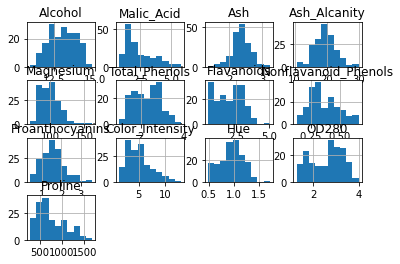

In [10]:
file.hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x2f5dbc60190>,
 'caps': [<matplotlib.lines.Line2D at 0x2f5dbc607f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2f5dbbcfd60>],
 'medians': [<matplotlib.lines.Line2D at 0x2f5dbc60f10>],
 'fliers': [<matplotlib.lines.Line2D at 0x2f5dbc712e0>],
 'means': []}

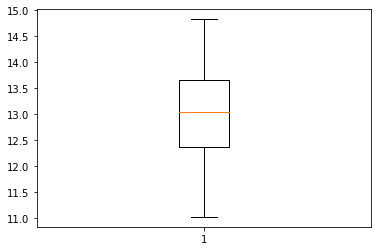

In [12]:
plt.boxplot(file["Alcohol"])

# 1) Agglomerative Hierarchical Clustering Algorithm

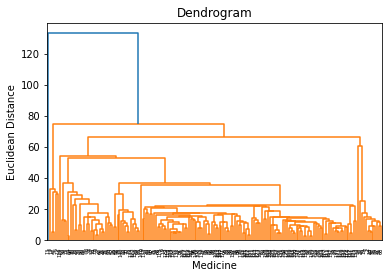

In [13]:
#show the Dendrogram(show step by step clustring formation)
data1=file
dgr = dg.dendrogram(dg.linkage(data1,method = 'single'))
plt.title('Dendrogram')
plt.xlabel('Medicine')
plt.ylabel('Euclidean Distance')
plt.show()

In [14]:
#Create the Agglomerative single Clustering Model with 50 clusters
cluster_model = AgglomerativeClustering(n_clusters =50,affinity = 'euclidean',linkage = 'single')
cluster_Hierarchical=cluster_model.fit_predict(data1)
cluster_Hierarchical

array([ 0, 15,  4, 43,  0, 35,  2,  4,  0, 12, 37, 47, 27, 31,  2, 10,  4,
       25,  0, 28, 34,  0,  4, 20, 22,  1, 13,  0,  1,  1, 19,  4, 11,  9,
       39, 36,  0,  4,  1,  4,  0, 24,  2, 20,  7, 49, 10, 25, 24, 17, 19,
        1, 22, 38,  6,  1,  8, 13,  9, 42,  0,  2, 24, 11, 18, 24,  2,  4,
        4,  3,  7, 33,  2,  2,  0, 23,  7, 11, 41,  1, 45, 32, 46,  7, 22,
        3, 15,  1,  1,  1, 16,  2, 40, 14,  1,  9,  2, 46, 10, 14,  2, 10,
       30,  1,  1, 23,  1,  1, 14,  1,  1,  1, 10,  2,  2,  1, 44,  2,  2,
       48,  3,  5, 44,  5,  5,  1,  1,  2,  1,  2,  1,  1,  2, 12,  3, 21,
        1,  1,  1, 23,  7, 44, 29,  1,  5,  1,  9,  9,  1, 23,  1,  1,  8,
       21,  1, 10,  3,  1,  6,  1,  1,  2,  1, 14,  1, 10,  2,  5,  2, 26,
       10,  9,  1,  1], dtype=int64)

In [15]:
#Assign the clusters to the data
data1["cluster"]=cluster_Hierarchical
pd.DataFrame(data1)

C:\Users\spide\AppData\Local\Temp/ipykernel_14064/1922062644.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["cluster"]=cluster_Hierarchical


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,cluster
0,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045,0
1,14.75,1.73,2.39,11.4,91.0,3.10,3.69,0.43,2.81,5.40,1.25,2.73,1150,15
2,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290,4
3,14.38,1.87,2.38,12.0,102.0,3.30,3.64,0.29,2.96,7.50,1.20,3.00,1547,43
4,14.38,3.59,2.28,16.0,102.0,3.25,3.17,0.27,2.19,4.90,1.04,3.44,1065,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,11.56,2.05,3.23,28.5,119.0,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465,26
176,11.46,3.74,1.82,19.5,107.0,3.18,2.58,0.24,3.58,2.90,0.75,2.81,562,10
177,11.45,2.40,2.42,20.0,96.0,2.90,2.79,0.32,1.83,3.25,0.80,3.39,625,9
178,11.41,0.74,2.50,21.0,88.0,2.48,2.01,0.42,1.44,3.08,1.10,2.31,434,1


{'whiskers': [<matplotlib.lines.Line2D at 0x2f5dbe34eb0>,
 'caps': [<matplotlib.lines.Line2D at 0x2f5dbe41610>,
 'boxes': [<matplotlib.lines.Line2D at 0x2f5dbe34b20>],
 'medians': [<matplotlib.lines.Line2D at 0x2f5dbe41d30>],
 'fliers': [<matplotlib.lines.Line2D at 0x2f5dbe4a100>],
 'means': []}

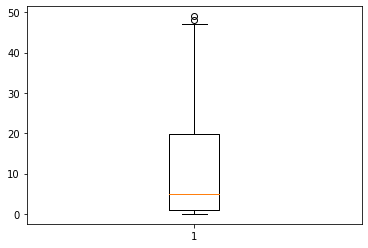

In [16]:
# Box plot for all data clusters
plt.boxplot(cluster_Hierarchical)

(array([84., 20., 19.,  7., 15.,  6.,  5.,  5.,  7.,  6.]),
 array([ 0. ,  4.9,  9.8, 14.7, 19.6, 24.5, 29.4, 34.3, 39.2, 44.1, 49. ]),
 <BarContainer object of 10 artists>)

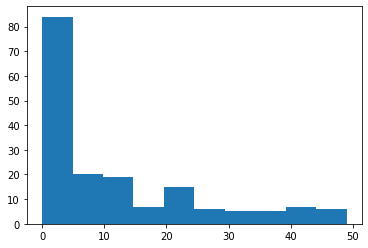

In [17]:
plt.hist(cluster_Hierarchical)

# 2) K-Medoids Clustering Algorithm 

In [18]:
data2 =file
data2.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,cluster
0,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045,0
1,14.75,1.73,2.39,11.4,91.0,3.10,3.69,0.43,2.81,5.40,1.25,2.73,1150,15
2,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290,4
3,14.38,1.87,2.38,12.0,102.0,3.30,3.64,0.29,2.96,7.50,1.20,3.00,1547,43
4,14.38,3.59,2.28,16.0,102.0,3.25,3.17,0.27,2.19,4.90,1.04,3.44,1065,0


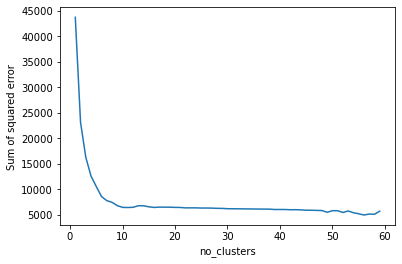

In [19]:
# plot the change of the error respect to number of clusters
list = []
k = range(1,60)
for i in k:
    km = KMedoids(n_clusters=i, max_iter= 100, random_state=1)
    km.fit(data2)
    list.append(km.inertia_)
plt.xlabel('no_clusters')
plt.ylabel('Sum of squared error')
plt.plot(k,list)

In [20]:
##### Apply the K-Medoids algorithm
kmed = KMedoids(n_clusters=50, max_iter=1000, random_state=42,metric="manhattan")

#Fit the kmedo function on the scaled data
kmed.fit(data2)
cluster_Medoids=kmed.predict(data2)

In [21]:
#Assign the clusters to the data
data2["cluster"]=cluster_Medoids
pd.DataFrame(data2)

C:\Users\spide\AppData\Local\Temp/ipykernel_14064/330263882.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2["cluster"]=cluster_Medoids


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,cluster
0,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045,24
1,14.75,1.73,2.39,11.4,91.0,3.10,3.69,0.43,2.81,5.40,1.25,2.73,1150,24
2,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290,47
3,14.38,1.87,2.38,12.0,102.0,3.30,3.64,0.29,2.96,7.50,1.20,3.00,1547,47
4,14.38,3.59,2.28,16.0,102.0,3.25,3.17,0.27,2.19,4.90,1.04,3.44,1065,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,11.56,2.05,3.23,28.5,119.0,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465,43
176,11.46,3.74,1.82,19.5,107.0,3.18,2.58,0.24,3.58,2.90,0.75,2.81,562,36
177,11.45,2.40,2.42,20.0,96.0,2.90,2.79,0.32,1.83,3.25,0.80,3.39,625,3
178,11.41,0.74,2.50,21.0,88.0,2.48,2.01,0.42,1.44,3.08,1.10,2.31,434,46


{'whiskers': [<matplotlib.lines.Line2D at 0x2f5dd080700>,
 'caps': [<matplotlib.lines.Line2D at 0x2f5dd080e20>,
 'boxes': [<matplotlib.lines.Line2D at 0x2f5dd080340>],
 'medians': [<matplotlib.lines.Line2D at 0x2f5dd08c580>],
 'fliers': [<matplotlib.lines.Line2D at 0x2f5dd08c910>],
 'means': []}

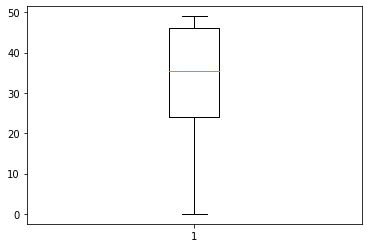

In [22]:
# Box plot for all data clusters
plt.boxplot(cluster_Medoids)

(array([ 5.,  5.,  6.,  5., 28.,  6.,  9., 28., 25., 57.]),
 array([ 0. ,  4.9,  9.8, 14.7, 19.6, 24.5, 29.4, 34.3, 39.2, 44.1, 49. ]),
 <BarContainer object of 10 artists>)

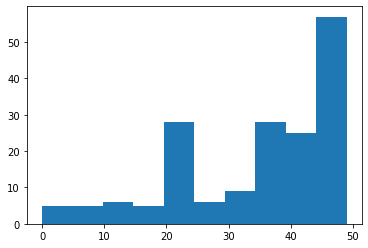

In [23]:
#Histogram to represent of each cluster 
plt.hist(cluster_Medoids)

# 3) naïve Bayes

#  <font color='red'>Read File</font>

In [42]:
file2 =pd.read_csv("glass_label.csv")
file2.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.00,0.0,6
1,1.52365,15.79,1.83,1.31,70.43,0.31,8.61,1.68,0.0,7
2,1.51508,15.15,0.00,2.25,73.50,0.00,8.34,0.63,0.0,7
3,1.51609,15.01,0.00,2.51,73.05,0.05,8.83,0.53,0.0,7
4,1.51888,14.99,0.78,1.74,72.50,0.00,9.95,0.00,0.0,6


# <font color='red'>clean file</font>

In [43]:
print(file2.shape)
file2=file2.drop_duplicates()
file2.shape

(212, 10)


(208, 10)

In [44]:
print(file2.isnull().any())
file2.isnull().sum()

RI      False
Na      False
Mg      False
Al      False
Si      False
K       False
Ca      False
Ba      False
Fe      False
Type    False
dtype: bool


RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

# <font color='red'>Data Visualization</font>

In [45]:
file2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208 entries, 0 to 211
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      208 non-null    float64
 1   Na      208 non-null    float64
 2   Mg      208 non-null    float64
 3   Al      208 non-null    float64
 4   Si      208 non-null    float64
 5   K       208 non-null    float64
 6   Ca      208 non-null    float64
 7   Ba      208 non-null    float64
 8   Fe      208 non-null    float64
 9   Type    208 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 17.9 KB


In [46]:
file2.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,1.518355,13.401394,2.681490,1.447837,72.647308,0.504135,8.954231,0.177404,0.056875,2.778846
std,0.003052,0.812921,1.444871,0.495414,0.776927,0.658752,1.440575,0.502923,0.098119,2.087259
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516517,12.922500,2.037500,1.190000,72.275000,0.130000,8.227500,0.000000,0.000000,1.000000
50%,1.517670,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519153,13.802500,3.600000,1.630000,73.082500,0.610000,9.142500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


array([[<AxesSubplot:title={'center':'RI'}>,
        <AxesSubplot:title={'center':'Na'}>,
        <AxesSubplot:title={'center':'Mg'}>],
       [<AxesSubplot:title={'center':'Al'}>,
        <AxesSubplot:title={'center':'Si'}>,
        <AxesSubplot:title={'center':'K'}>],
       [<AxesSubplot:title={'center':'Ca'}>,
        <AxesSubplot:title={'center':'Ba'}>,
        <AxesSubplot:title={'center':'Fe'}>],
       [<AxesSubplot:title={'center':'Type'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

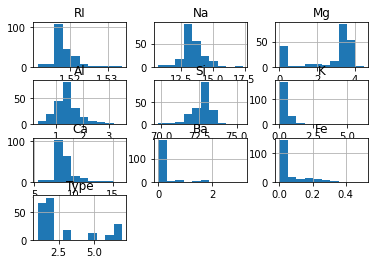

In [29]:
file2.hist()

<AxesSubplot:>

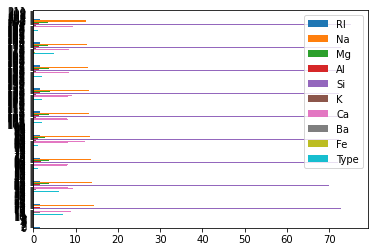

In [30]:
file2.plot.barh()

{'whiskers': [<matplotlib.lines.Line2D at 0x2f5df5bb640>,
 'caps': [<matplotlib.lines.Line2D at 0x2f5df5bbd30>,
 'boxes': [<matplotlib.lines.Line2D at 0x2f5df5bb2b0>],
 'medians': [<matplotlib.lines.Line2D at 0x2f5df5a8490>],
 'fliers': [<matplotlib.lines.Line2D at 0x2f5df5a8820>],
 'means': []}

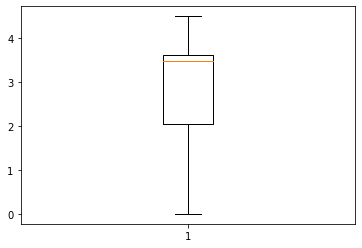

In [31]:
plt.boxplot(file2["Mg"])

In [32]:
naive_file=file2
labels = naive_file['Type'].values
data_naive = naive_file.drop(columns=['Type'])

In [33]:
#Split the data and label to train and test sets
(x_train,x_test,y_train,y_test)=train_test_split(data_naive,labels,test_size=0.3,random_state=1)

print('x_train shape is ' , x_train.shape)
print('x_test shape is ' , x_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

x_train shape is  (145, 9)
x_test shape is  (63, 9)
y_train shape is  (145,)
y_test shape is  (63,)


In [34]:
#Apply the Naive-Bayes algorithm
bayes=GaussianNB()
#Fit the training data with the training label
bayes_fit=bayes.fit(x_train,y_train)
#predict the test data set
predict=bayes.predict(x_test)
print('Predicted Value for naive bayes is : ' , predict)

Predicted Value for naive bayes is :  [1 1 1 1 6 6 2 5 5 1 6 1 1 6 1 1 7 2 6 7 1 1 7 7 1 1 7 1 7 1 1 1 5 6 1 1 1
 7 1 1 7 5 1 2 1 5 1 1 1 3 1 1 1 7 5 1 6 1 1 1 1 1 1]


In [35]:
#Assign the labels to the tested data
show=pd.DataFrame(x_test)
show["class"]=predict
show

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,class
188,1.51629,12.71,3.33,1.49,73.28,0.67,8.24,0.0,0.00,1
157,1.51663,12.93,3.54,1.62,72.96,0.64,8.03,0.0,0.21,1
167,1.51592,12.86,3.52,2.12,72.66,0.69,7.97,0.0,0.00,1
203,1.51743,12.20,3.25,1.16,73.55,0.62,8.90,0.0,0.24,1
60,1.51818,13.72,0.00,0.56,74.45,0.00,10.99,0.0,0.00,6
...,...,...,...,...,...,...,...,...,...,...
90,1.51846,13.41,3.89,1.33,72.38,0.51,8.28,0.0,0.00,1
41,1.52121,14.03,3.76,0.58,71.79,0.11,9.65,0.0,0.00,1
116,1.51687,13.23,3.54,1.48,72.84,0.56,8.10,0.0,0.00,1
134,1.51593,13.09,3.59,1.52,73.10,0.67,7.83,0.0,0.00,1


In [36]:
#Calculate the accuracy
acc=bayes.score(x_train,y_train)
acc=acc*100
print("The accuracy of our naive Bayes model is ",int(acc),"%")

The accuracy of our naive Bayes model is  57 %


(array([37.,  3.,  0.,  1.,  0.,  0.,  6.,  0.,  7.,  9.]),
 array([1. , 1.6, 2.2, 2.8, 3.4, 4. , 4.6, 5.2, 5.8, 6.4, 7. ]),
 <BarContainer object of 10 artists>)

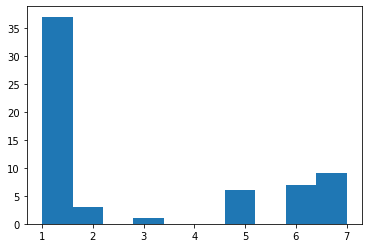

In [37]:
#histogram to show the distribution of the predicted data in the class labels
plt.hist(predict)

{'whiskers': [<matplotlib.lines.Line2D at 0x2f5df6be280>,
 'caps': [<matplotlib.lines.Line2D at 0x2f5df6be9a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2f5df6aeeb0>],
 'medians': [<matplotlib.lines.Line2D at 0x2f5df6c9100>],
 'fliers': [<matplotlib.lines.Line2D at 0x2f5df6c9490>],
 'means': []}

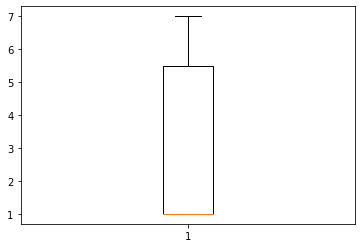

In [38]:
# Box plot for the predicted data labels
plt.boxplot(predict)

Confusion Matrix is : 
 [[15  0  0  0  1  1]
 [19  2  1  3  2  1]
 [ 3  0  0  0  0  0]
 [ 0  1  0  3  0  1]
 [ 0  0  0  0  4  0]
 [ 0  0  0  0  0  6]]


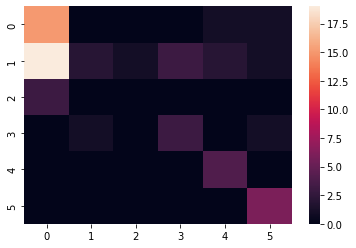

In [39]:
#Calculating Confusion Matrix
CM = confusion_matrix(y_test, predict)
print('Confusion Matrix is : \n', CM)

# drawing confusion matrix
sns.heatmap(CM)
plt.show()

# <font color='red'>Comparison Between The 2 Clustring Algorithm</font>

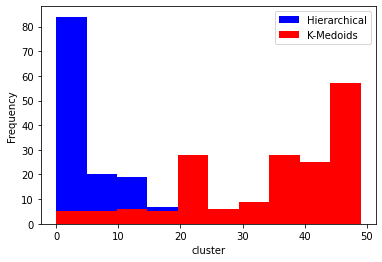

In [40]:
#histogram to show the frequently of each cluster 
plt.hist(cluster_Hierarchical,color="blue")
plt.hist(cluster_Medoids,color="red")
plt.xlabel("cluster")
plt.ylabel("Frequency")
plt.legend(labels=['Hierarchical', 'K-Medoids'])

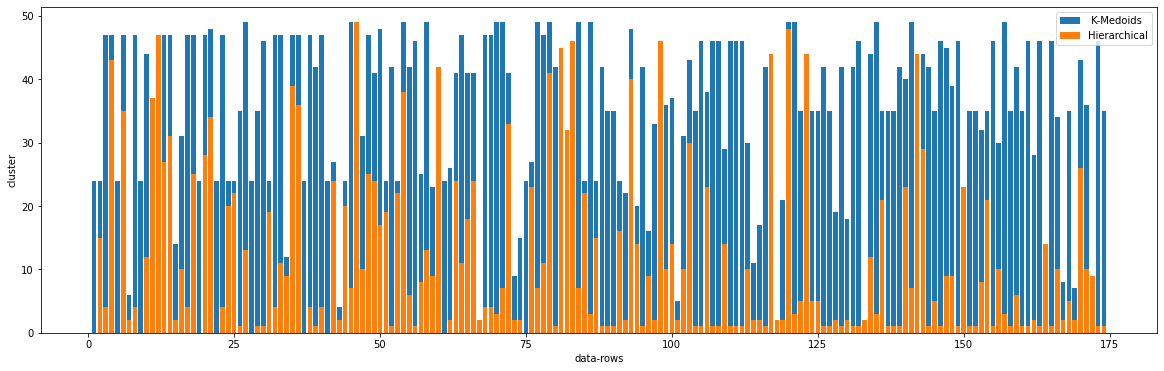

In [41]:
# Bar plot show the cluster of each row of data
plt.figure(figsize=(20,6))
plt.bar(np.arange(1,175,1),cluster_Medoids)
plt.bar(np.arange(1,175,1),cluster_Hierarchical)
plt.xlabel("data-rows")
plt.ylabel("cluster")
plt.legend(labels=[' K-Medoids', 'Hierarchical'])